<a href="https://colab.research.google.com/github/Saimani5454/Basics_stats/blob/main/Basics_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1a)Load the dataset into a data analysis tool or programming environment
import pandas as pd
import numpy as np
sale_count=pd.read_csv('/content/sales_data_with_discounts.csv')
sale_count.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [2]:
#1b)Identify numerical columns in the dataset
numerical_cols=sale_count.select_dtypes(include=np.number).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [3]:
#1c)calculate the mean,median,mode,and standard_deviation
for col in numerical_cols:
  mean=sale_count[col].mean()
  median=sale_count[col].median()
  mode=sale_count[col].mode()[0]
  std_dev=sale_count[col].std()
  print(mean)
  print(median)
  print(mode)
  print(std_dev)


5.066666666666666
4.0
3
4.231602391213926
10453.433333333332
1450.0
400
18079.90483993645
33812.83555555555
5700.0
24300
50535.07417255328
15.155241895330914
16.57776564929597
5.007822189204133
4.220602153325511
3346.499424342415
988.9337332382784
69.17794228822787
4509.9029633539985
30466.336131270138
4677.788059301853
326.97480055470817
46358.656624066934


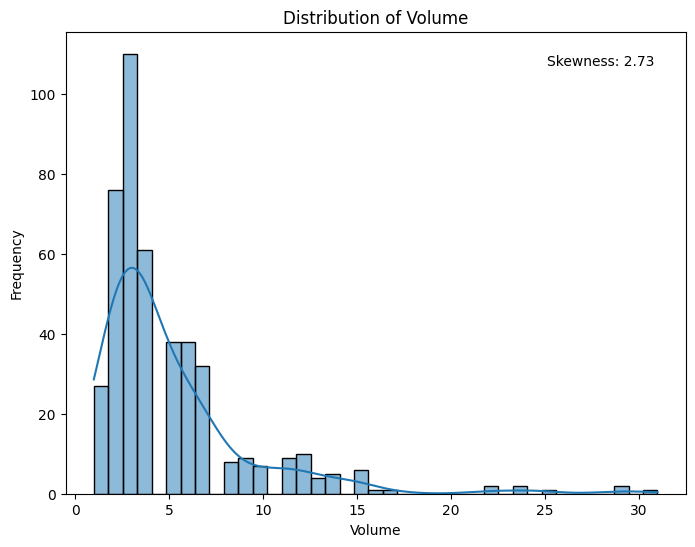

Number of outliers in Volume: 44
The distribution of Volume is significantly skewed to the right (positive skew).
Potential outliers are present in Volume. Further investigation is needed.
----------------------------------------


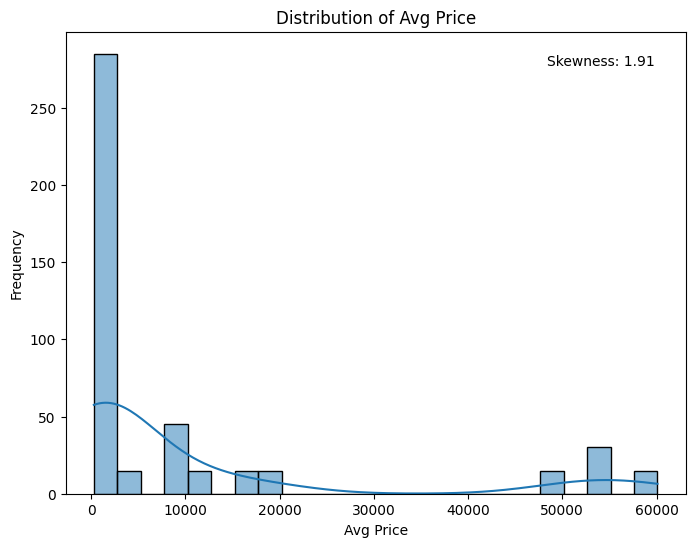

Number of outliers in Avg Price: 60
The distribution of Avg Price is significantly skewed to the right (positive skew).
Potential outliers are present in Avg Price. Further investigation is needed.
----------------------------------------


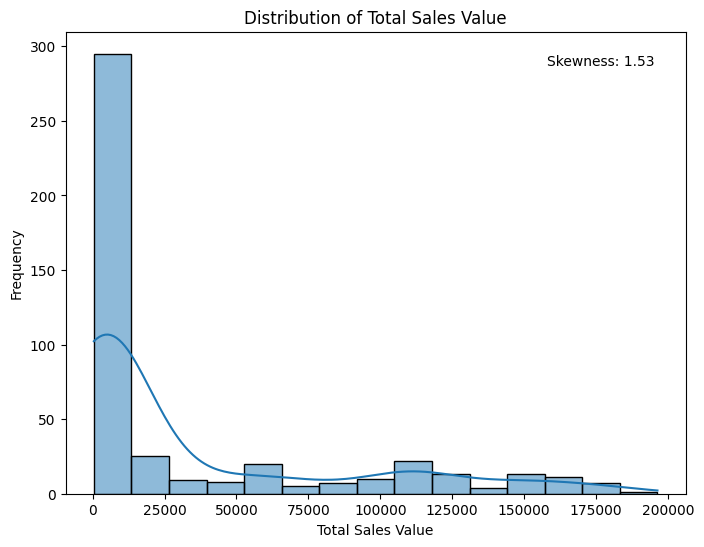

Number of outliers in Total Sales Value: 36
The distribution of Total Sales Value is significantly skewed to the right (positive skew).
Potential outliers are present in Total Sales Value. Further investigation is needed.
----------------------------------------


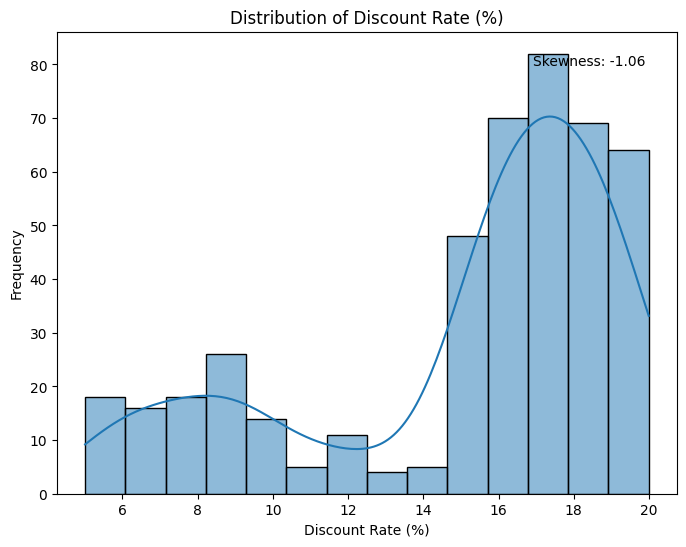

Number of outliers in Discount Rate (%): 45
The distribution of Discount Rate (%) is significantly skewed to the left (negative skew).
Potential outliers are present in Discount Rate (%). Further investigation is needed.
----------------------------------------


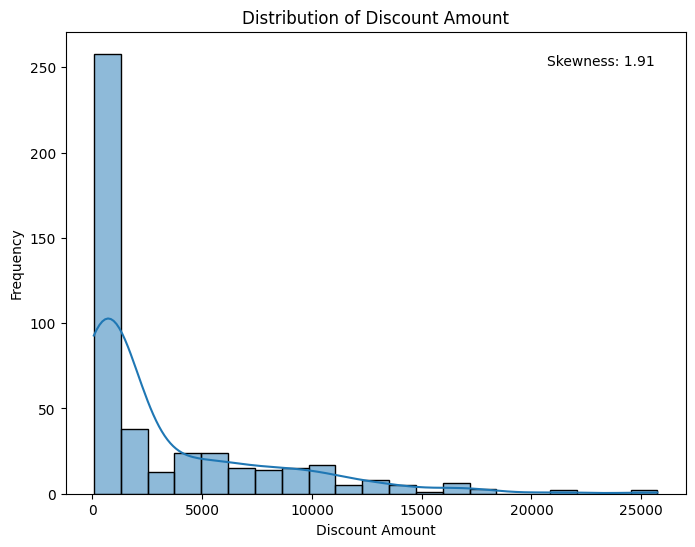

Number of outliers in Discount Amount: 24
The distribution of Discount Amount is significantly skewed to the right (positive skew).
Potential outliers are present in Discount Amount. Further investigation is needed.
----------------------------------------


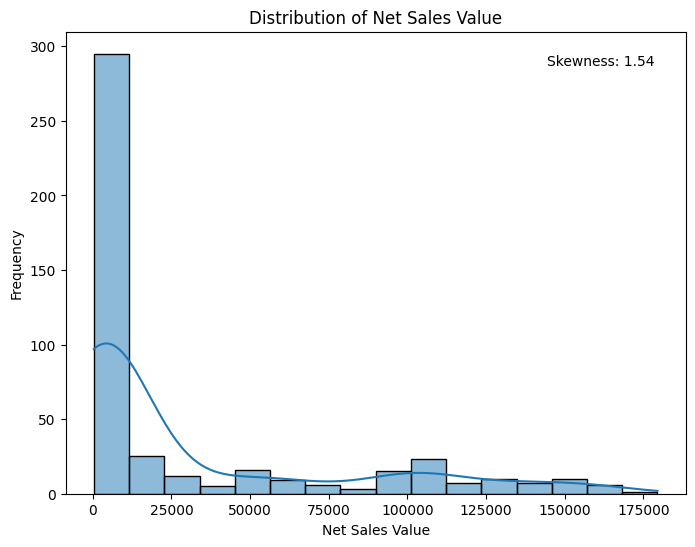

Number of outliers in Net Sales Value: 35
The distribution of Net Sales Value is significantly skewed to the right (positive skew).
Potential outliers are present in Net Sales Value. Further investigation is needed.
----------------------------------------


In [4]:
# prompt: #2a)	Plot histograms for each numerical column.
# Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sale_count' DataFrame is already loaded as in the previous code

for col in numerical_cols:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(sale_count[col], kde=True)  # Include KDE for better visualization
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  # Calculate skewness
  skewness = sale_count[col].skew()
  plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

  plt.show()

  # Analyze for outliers (example using IQR)
  Q1 = sale_count[col].quantile(0.25)
  Q3 = sale_count[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = sale_count[(sale_count[col] < lower_bound) | (sale_count[col] > upper_bound)]
  num_outliers = len(outliers)

  print(f"Number of outliers in {col}: {num_outliers}")

  # Provide inferences based on the histogram and skewness
  if skewness > 0.5:
    print(f"The distribution of {col} is significantly skewed to the right (positive skew).")
  elif skewness < -0.5:
    print(f"The distribution of {col} is significantly skewed to the left (negative skew).")
  else:
    print(f"The distribution of {col} appears relatively symmetric.")

  if num_outliers > 0:
    print(f"Potential outliers are present in {col}. Further investigation is needed.")
  else:
    print(f"No significant outliers detected in {col}.")

  print("-" * 40) # Separator between columns


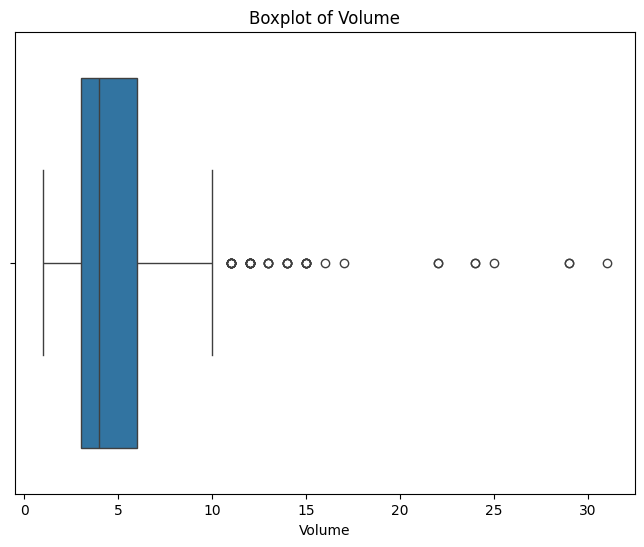

For Volume:
  Q1: 3.0
  Q3: 6.0
  IQR: 3.0
  Number of outliers: 44
  Outliers: [15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11
 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17]
----------------------------------------


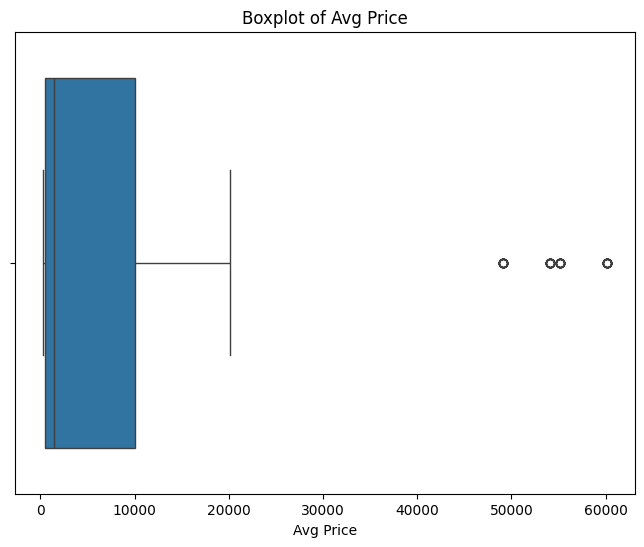

For Avg Price:
  Q1: 465.0
  Q3: 10100.0
  IQR: 9635.0
  Number of outliers: 60
  Outliers: [49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100]
----------------------------------------


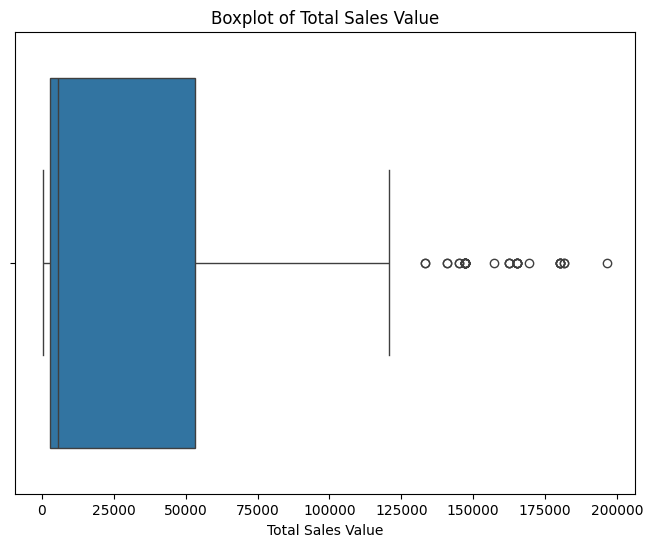

For Total Sales Value:
  Q1: 2700.0
  Q3: 53200.0
  IQR: 50500.0
  Number of outliers: 36
  Outliers: [181500 147300 180300 133100 147300 165300 180300 196400 147300 147300
 162300 162300 145200 147300 162300 165300 180300 169400 147300 181500
 140700 147300 165300 145200 147300 165300 180300 165300 180300 140700
 147300 133100 147300 157300 147300 165300]
----------------------------------------


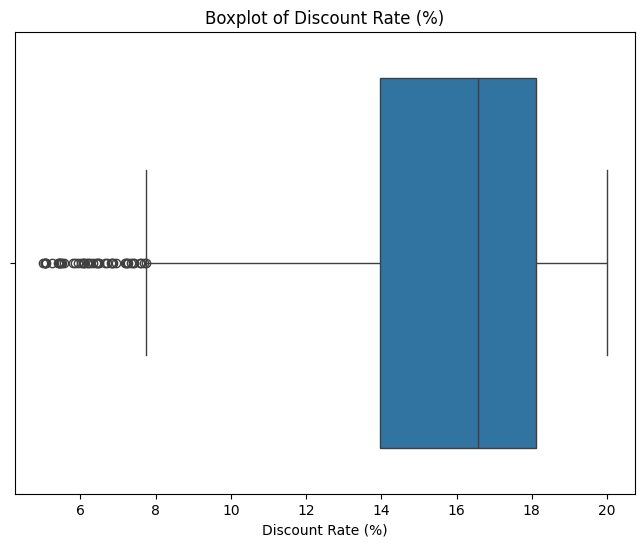

For Discount Rate (%):
  Q1: 13.965062543701741
  Q3: 18.114718477752703
  IQR: 4.149655934050962
  Number of outliers: 45
  Outliers: [6.93538533 5.55371934 7.41010449 6.2148882  5.25211255 7.62179096
 5.00782219 5.87067094 6.71045354 6.09520144 5.93508419 7.58459064
 7.73266709 7.23384674 5.42050666 6.84997564 7.25669557 7.1787259
 7.6793856  5.79480208 5.05980128 6.85825457 7.20836295 7.34187434
 6.47330471 6.43991996 7.4213256  6.26891381 6.81911066 6.17039789
 5.07212419 6.1069307  6.50871908 6.06619192 5.08410843 6.32689169
 6.41523029 5.05521841 5.41180219 5.51104232 5.48515667 5.46637934
 6.00819957 6.64259534 5.42591053]
----------------------------------------


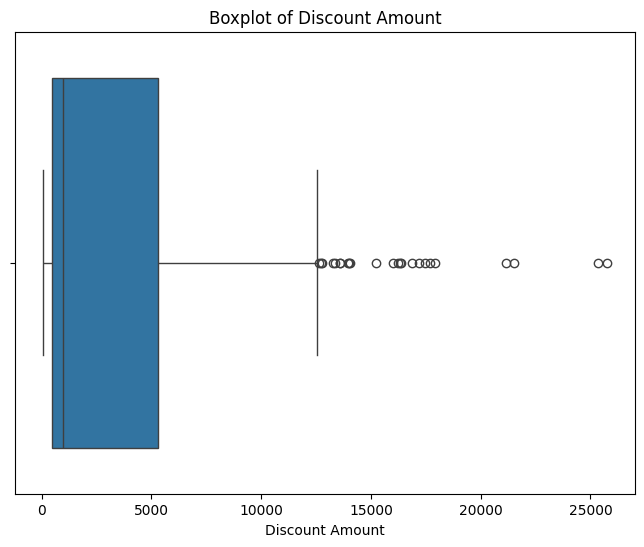

For Discount Amount:
  Q1: 460.4593038855329
  Q3: 5316.4954266866525
  IQR: 4856.03612280112
  Number of outliers: 24
  Outliers: [21153.49881959 13594.039719   17900.98373313 17445.6038281
 13951.66019446 16384.02900944 16892.52095098 15214.6433236
 12622.50365771 17178.33185948 12753.56595799 13999.93849871
 17696.81362055 25328.2242042  13608.23831923 25738.02219376
 21496.67536736 16332.91992954 14036.83865216 12734.00901241
 13275.78074114 16218.59472035 13382.22733346 15984.73228058]
----------------------------------------


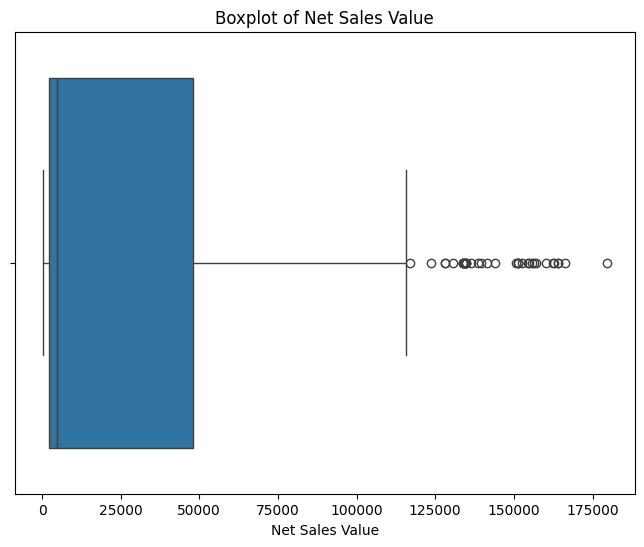

For Net Sales Value:
  Q1: 2202.2086453212287
  Q3: 47847.91285159138
  IQR: 45645.70420627015
  Number of outliers: 35
  Outliers: [160346.50118041 133705.960281   162399.01626687 139563.63821492
 151348.33980554 163915.971      179507.47904902 134677.49634229
 134731.95462498 152667.35835357 151182.48953317 128021.66814052
 134546.43404201 150648.92786553 151300.06150129 162603.18637945
 144071.7757958  133691.76168077 155761.97780624 130557.83332703
 136485.41909127 154937.48547455 123703.32463264 134934.94669154
 154541.08736469 163967.08007046 156895.96877157 166263.16134784
 127965.99098759 134024.21925886 116881.40527965 133917.77266654
 141315.26771942 138449.92203905 156330.96988963]
----------------------------------------


In [5]:
# prompt: 	Create boxplots for numerical variables to identify outliers and the interquartile range.
# 	Discuss any findings, such as extreme values or unusual distributions

import matplotlib.pyplot as plt
# Assuming 'sale_count' DataFrame and 'numerical_cols' are already defined as in the previous code

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=sale_count[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Calculate quartiles and IQR
    Q1 = sale_count[col].quantile(0.25)
    Q3 = sale_count[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"For {col}:")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sale_count[(sale_count[col] < lower_bound) | (sale_count[col] > upper_bound)]

    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outliers: {outliers[col].values}") # Print the outlier values

    print("-" * 40)


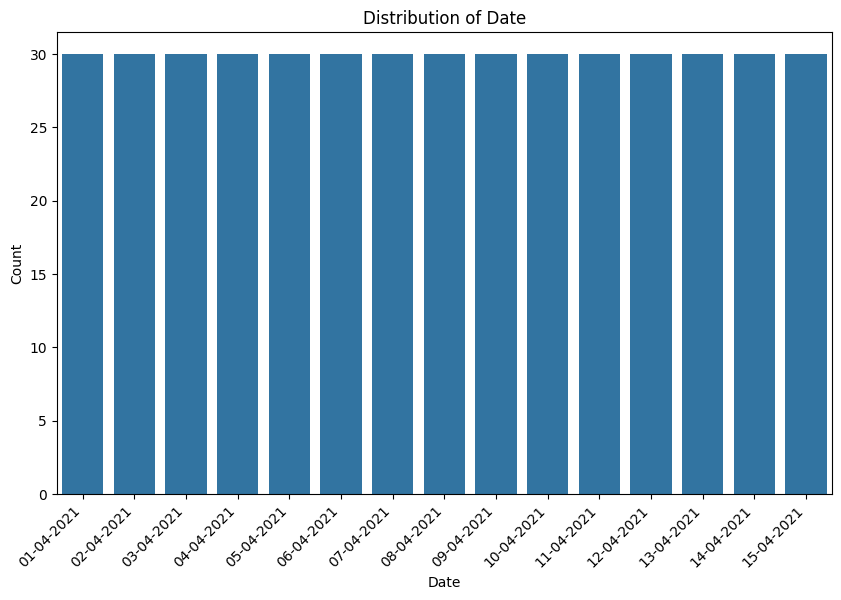

Category counts for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'Date' is '01-04-2021' with a count of 30.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


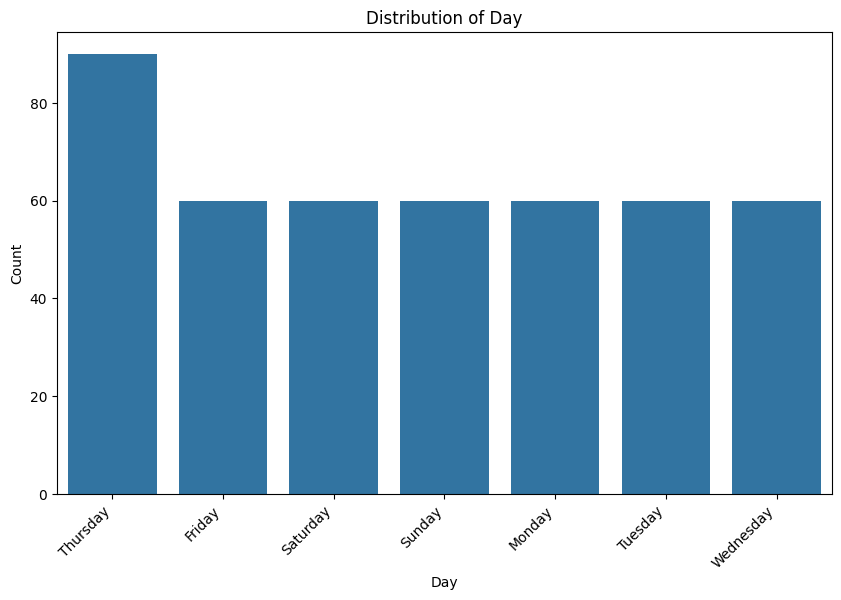

Category counts for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'Day' is 'Thursday' with a count of 90.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


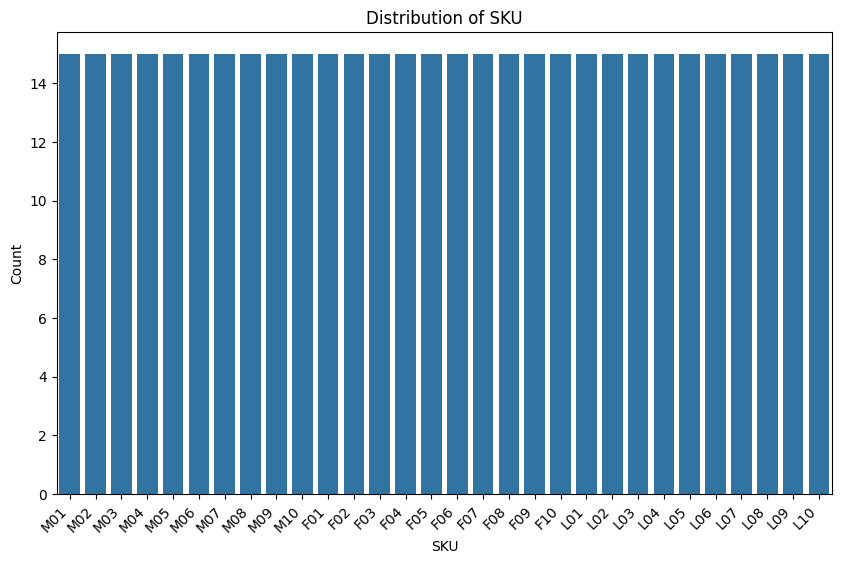

Category counts for SKU:
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'SKU' is 'M01' with a count of 15.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


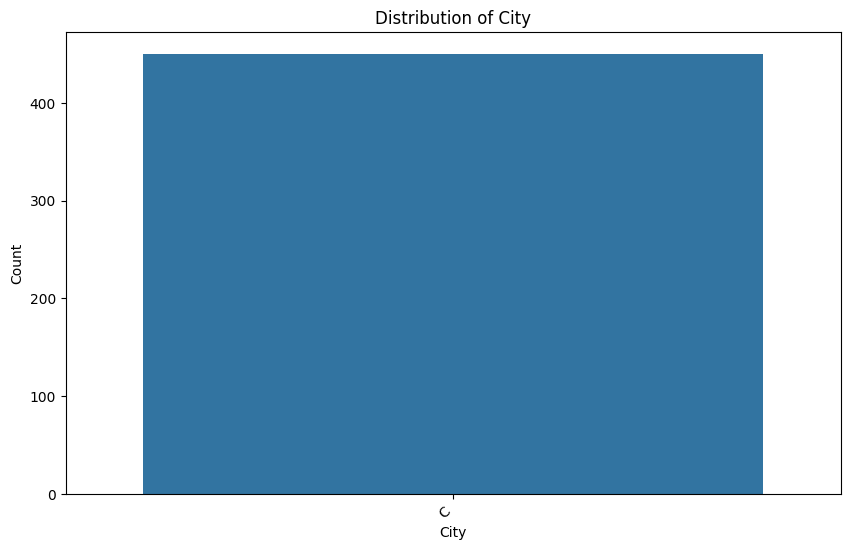

Category counts for City:
City
C    450
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'City' is 'C' with a count of 450.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


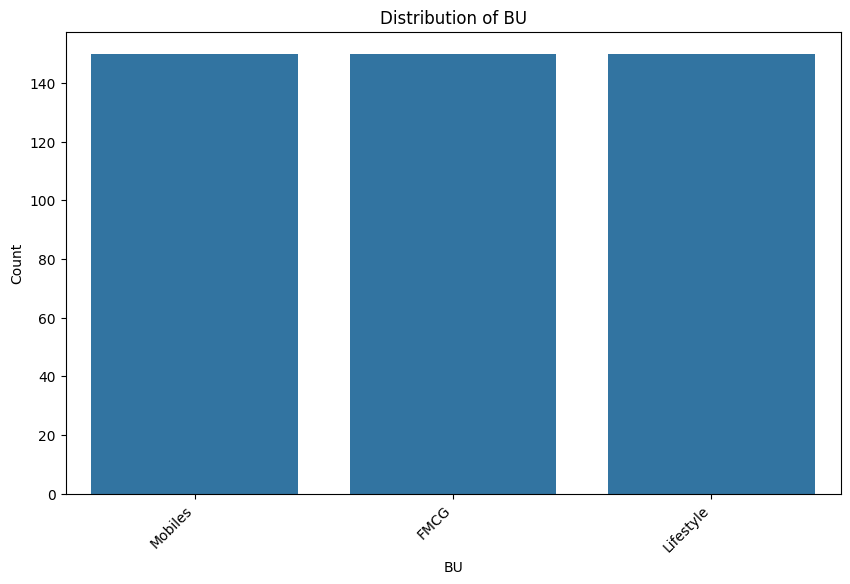

Category counts for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'BU' is 'Mobiles' with a count of 150.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


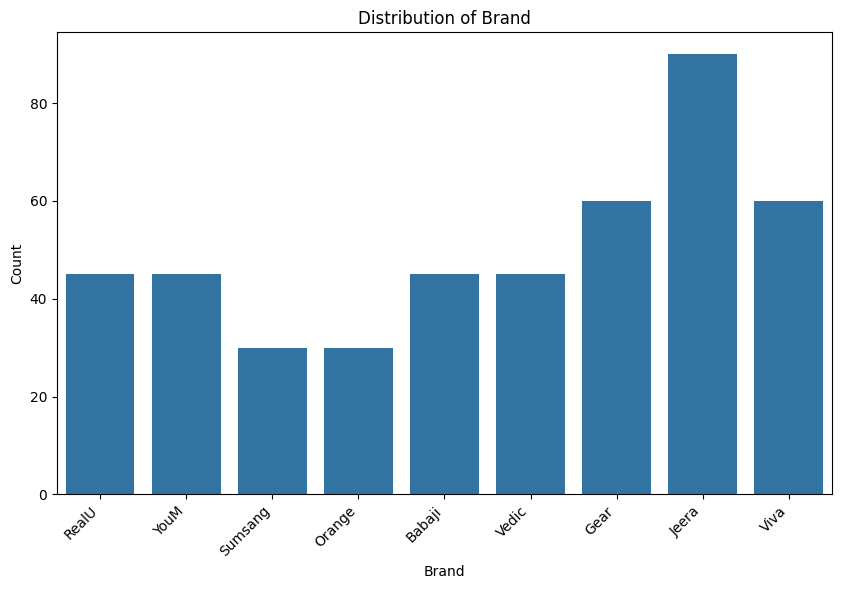

Category counts for Brand:
Brand
Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'Brand' is 'Jeera' with a count of 90.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


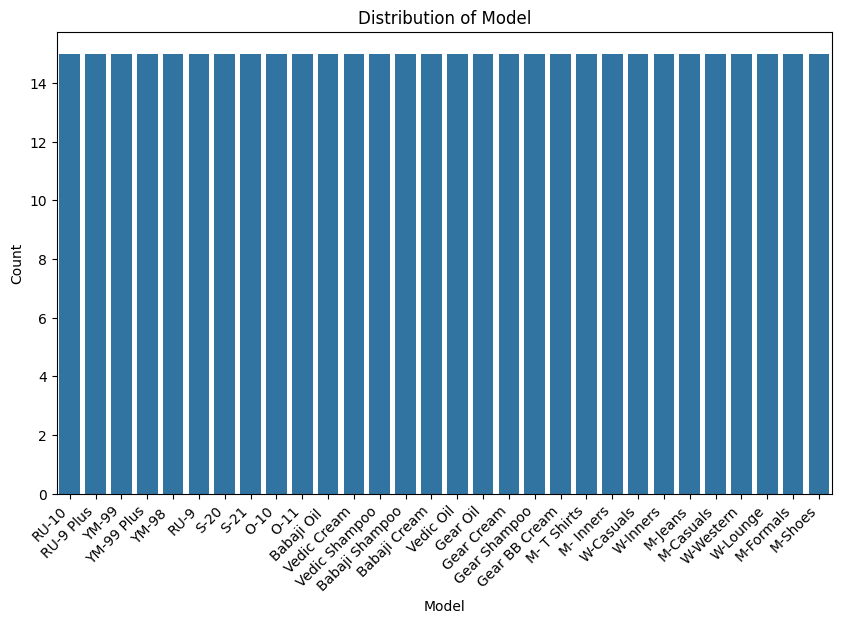

Category counts for Model:
Model
RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             15
RU-9              15
S-20              15
S-21              15
O-10              15
O-11              15
Babaji Oil        15
Vedic Cream       15
Vedic Shampoo     15
Babaji Shampoo    15
Babaji Cream      15
Vedic Oil         15
Gear Oil          15
Gear Cream        15
Gear Shampoo      15
Gear BB Cream     15
M- T Shirts       15
M- Inners         15
W-Casuals         15
W-Inners          15
M-Jeans           15
M-Casuals         15
W-Western         15
W-Lounge          15
M-Formals         15
M-Shoes           15
Name: count, dtype: int64
----------------------------------------
The most frequent category in 'Model' is 'RU-10' with a count of 15.
----------------------------------------


<ipython-input-6-8136e81aaa9a>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")


In [6]:
# prompt: 	Identify categorical columns in the dataset.
# 	Create bar charts to visualize the frequency or count of each category.
# 	Analyze the distribution of categories and provide insights.

import matplotlib.pyplot as plt
# Identify categorical columns
categorical_cols = sale_count.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=sale_count)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Analyze category distribution
    category_counts = sale_count[col].value_counts()
    print(f"Category counts for {col}:\n{category_counts}")
    print("-" * 40)


    # Provide insights (example: identify the most frequent category)
    most_frequent_category = category_counts.index[0]
    print(f"The most frequent category in '{col}' is '{most_frequent_category}' with a count of {category_counts[0]}.")




Standardization (or Z-score normalization) is a data scaling technique used in data preprocessing. It transforms data to have a mean of 0 and a standard deviation of 1.
The formula for standardization is: z = (x - μ) / σ, where:
  - x is the original data point
  - μ (mu) is the mean of the data
  - σ (sigma) is the standard deviation of the data
This process centers the data around zero and scales it to unit variance, making it easier to compare features that have different scales and units.

--- Data Distribution Comparison (Before and After Standardization) ---


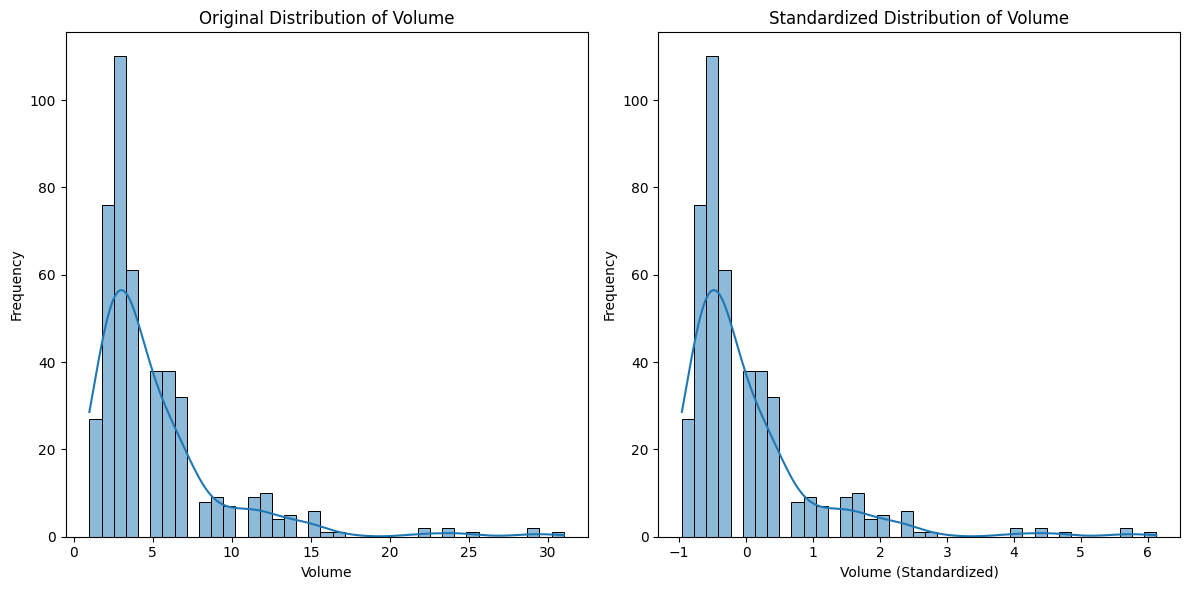

Summary Statistics for Volume:
Original:
count    450.000000
mean       5.066667
std        4.231602
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       31.000000
Name: Volume, dtype: float64

Standardized:
count    4.500000e+02
mean     4.934325e-17
std      1.000000e+00
min     -9.610229e-01
25%     -4.883887e-01
50%     -2.520716e-01
75%      2.205626e-01
max      6.128490e+00
Name: Volume, dtype: float64


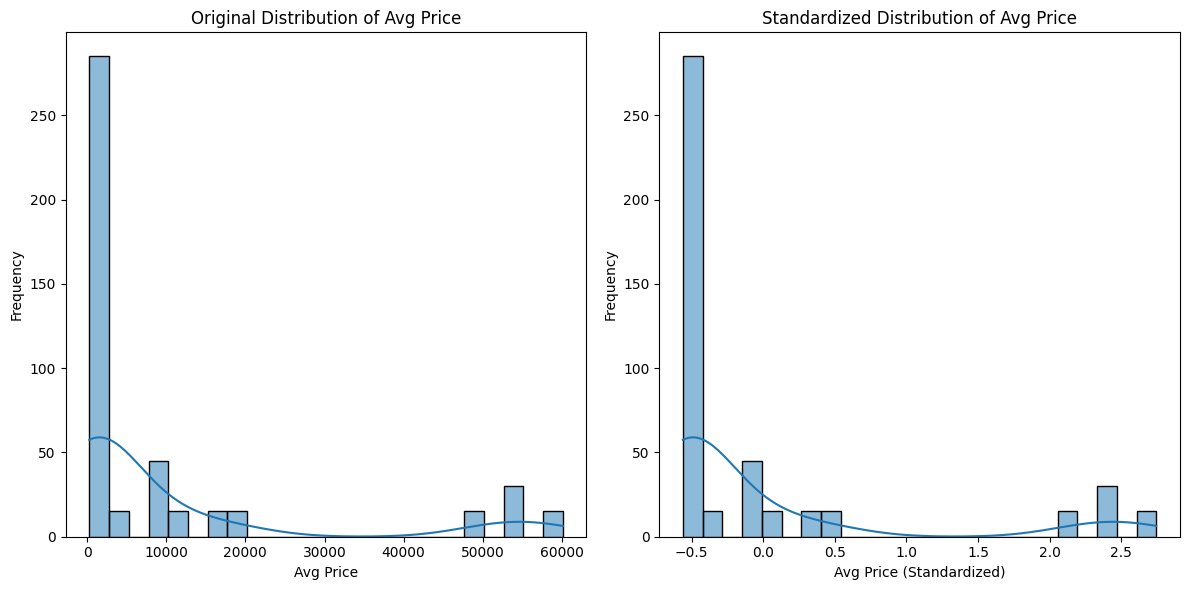

Summary Statistics for Avg Price:
Original:
count      450.000000
mean     10453.433333
std      18079.904840
min        290.000000
25%        465.000000
50%       1450.000000
75%      10100.000000
max      60100.000000
Name: Avg Price, dtype: float64

Standardized:
count    4.500000e+02
mean     3.947460e-17
std      1.000000e+00
min     -5.621398e-01
25%     -5.524605e-01
50%     -4.979801e-01
75%     -1.954841e-02
max      2.745953e+00
Name: Avg Price, dtype: float64


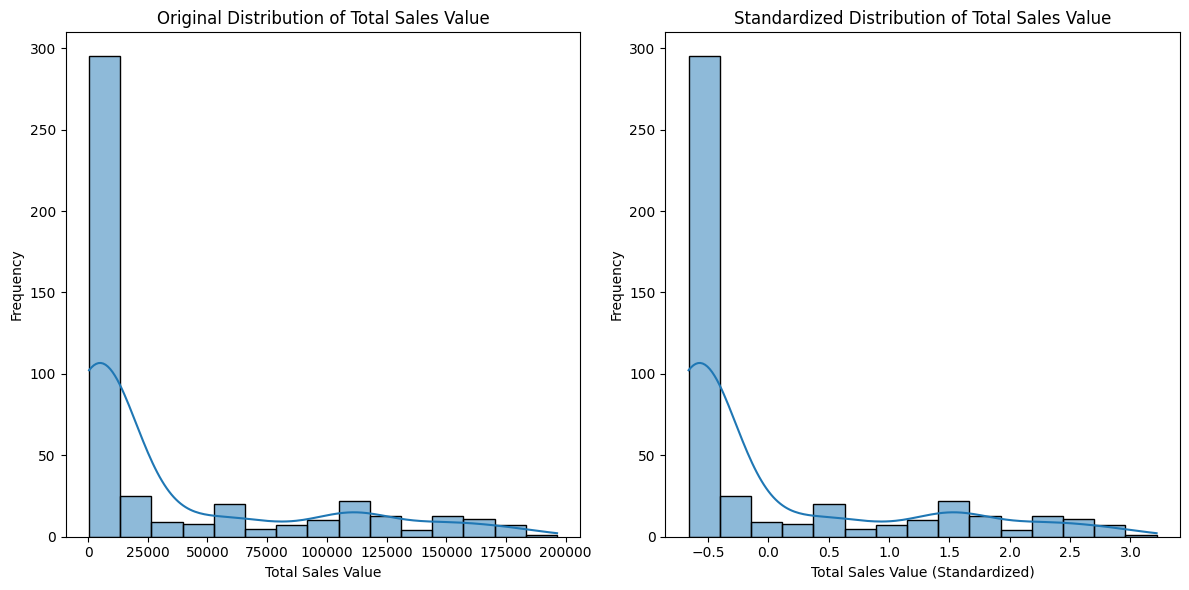

Summary Statistics for Total Sales Value:
Original:
count       450.000000
mean      33812.835556
std       50535.074173
min         400.000000
25%        2700.000000
50%        5700.000000
75%       53200.000000
max      196400.000000
Name: Total Sales Value, dtype: float64

Standardized:
count    4.500000e+02
mean     1.184238e-17
std      1.000000e+00
min     -6.611811e-01
25%     -6.156681e-01
50%     -5.563034e-01
75%      3.836378e-01
max      3.217313e+00
Name: Total Sales Value, dtype: float64


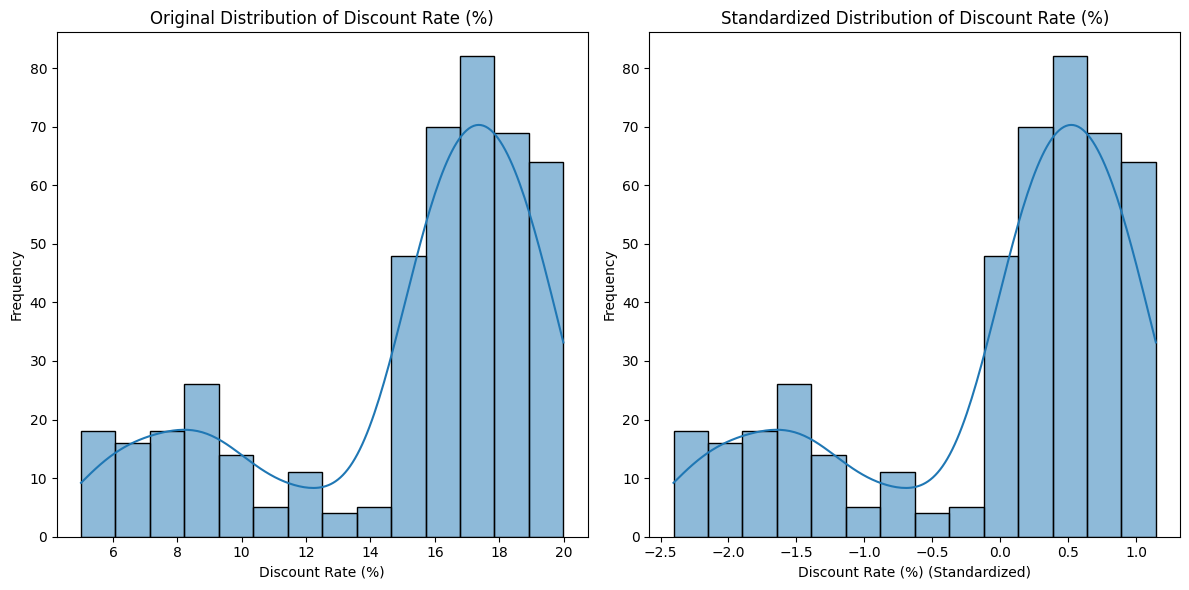

Summary Statistics for Discount Rate (%):
Original:
count    450.000000
mean      15.155242
std        4.220602
min        5.007822
25%       13.965063
50%       16.577766
75%       18.114718
max       19.992407
Name: Discount Rate (%), dtype: float64

Standardized:
count    4.500000e+02
mean    -3.552714e-17
std      1.000000e+00
min     -2.404259e+00
25%     -2.819928e-01
50%      3.370428e-01
75%      7.011977e-01
max      1.146084e+00
Name: Discount Rate (%), dtype: float64


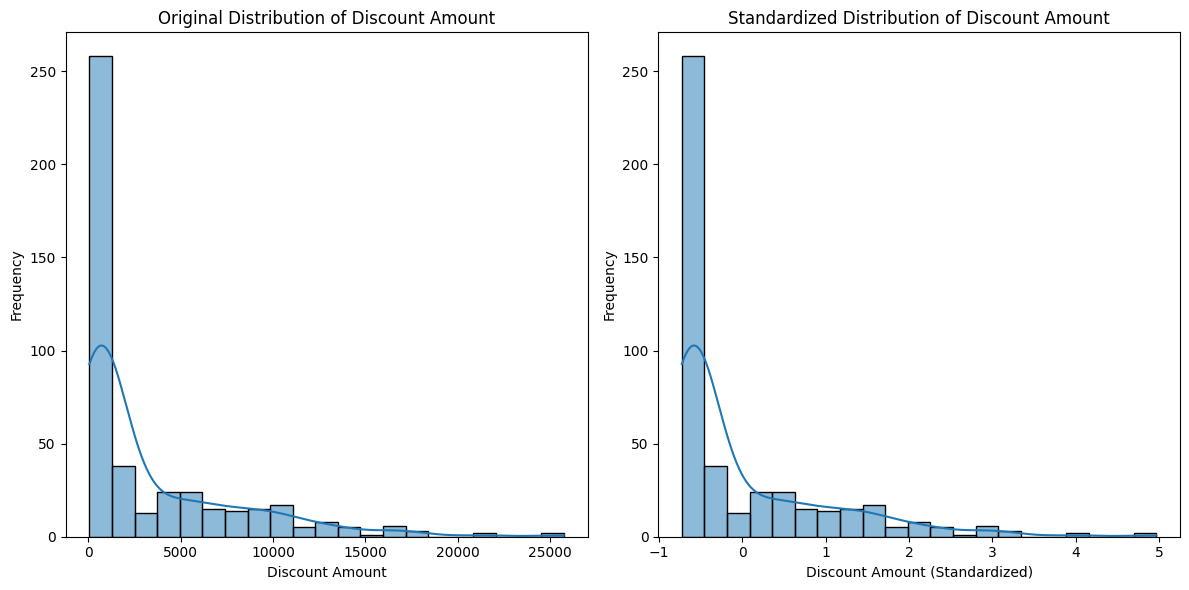

Summary Statistics for Discount Amount:
Original:
count      450.000000
mean      3346.499424
std       4509.902963
min         69.177942
25%        460.459304
50%        988.933733
75%       5316.495427
max      25738.022194
Name: Discount Amount, dtype: float64

Standardized:
count    4.500000e+02
mean    -5.921189e-17
std      1.000000e+00
min     -7.266945e-01
25%     -6.399340e-01
50%     -5.227531e-01
75%      4.368156e-01
max      4.964968e+00
Name: Discount Amount, dtype: float64


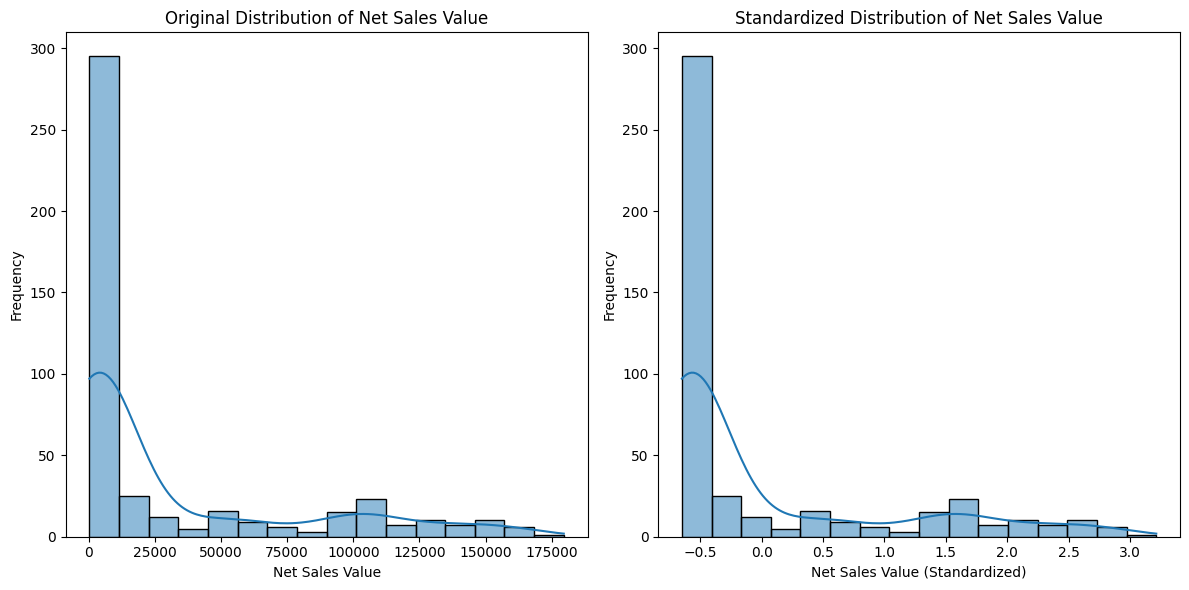

Summary Statistics for Net Sales Value:
Original:
count       450.000000
mean      30466.336131
std       46358.656624
min         326.974801
25%        2202.208645
50%        4677.788059
75%       47847.912852
max      179507.479049
Name: Net Sales Value, dtype: float64

Standardized:
count    4.500000e+02
mean     3.947460e-18
std      1.000000e+00
min     -6.501345e-01
25%     -6.096839e-01
50%     -5.562833e-01
75%      3.749370e-01
max      3.214958e+00
Name: Net Sales Value, dtype: float64


In [12]:
#Standarization Numerical Variables
# prompt: Explain the concept of standardization (z-score normalization).
# 	Standardize the numerical columns using the formula: z=x-mu/sigma
# 	Show before and after comparisons of the data distributions

import matplotlib.pyplot as plt
# Explain the concept of standardization (z-score normalization)
print("Standardization (or Z-score normalization) is a data scaling technique used in data preprocessing. It transforms data to have a mean of 0 and a standard deviation of 1.")
print("The formula for standardization is: z = (x - μ) / σ, where:")
print("  - x is the original data point")
print("  - μ (mu) is the mean of the data")
print("  - σ (sigma) is the standard deviation of the data")
print("This process centers the data around zero and scales it to unit variance, making it easier to compare features that have different scales and units.")

# Standardize the numerical columns
sale_count_standardized = sale_count.copy()

for col in numerical_cols:
  mean = sale_count[col].mean()
  std_dev = sale_count[col].std()

  # Avoid division by zero if standard deviation is zero
  if std_dev > 0:
    sale_count_standardized[col] = (sale_count[col] - mean) / std_dev
  else:
    # If std_dev is 0, all values are the same, so standardization isn't meaningful.
    # We can keep the original values or set them to 0.
    # Here, we'll set them to 0 as per the z-score definition when std_dev is 0.
    sale_count_standardized[col] = 0

# Show before and after comparisons of the data distributions
print("\n--- Data Distribution Comparison (Before and After Standardization) ---")

for col in numerical_cols:
  plt.figure(figsize=(12, 6))

  # Before Standardization
  plt.subplot(1, 2, 1)
  sns.histplot(sale_count[col], kde=True)
  plt.title(f'Original Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  # After Standardization
  plt.subplot(1, 2, 2)
  sns.histplot(sale_count_standardized[col], kde=True)
  plt.title(f'Standardized Distribution of {col}')
  plt.xlabel(f'{col} (Standardized)')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

  # Print summary statistics to show the effect of standardization
  print(f"Summary Statistics for {col}:")
  print("Original:")
  print(sale_count[col].describe())
  print("\nStandardized:")
  print(sale_count_standardized[col].describe())


In [14]:
# prompt: 	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
# 	Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
# 	Display a portion of the transformed dataset.

import pandas as pd



# Apply one-hot encoding to the categorical columns
# We will drop the first category of each feature to avoid multicollinearity (dummy variable trap)
sale_count_encoded = pd.get_dummies(sale_count, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print("\n--- Transformed Dataset (after One-Hot Encoding) ---")
print(sale_count_encoded.head())


--- Transformed Dataset (after One-Hot Encoding) ---
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_V